In [64]:
belief_rename_map = {
    'human_belief': 'Human Belief',
    'gpt3.5_belief': 'GPT-3.5 Belief',
    'gpt4_belief': 'GPT-4 Turbo Belief',
    'gpt4o_belief': 'GPT-4o Belief'
}
behaviours_map = {
    'human_behaviour': 'Human Behaviour',
    'gpt3.5_behaviour': 'GPT-3.5 Behaviour',
    'gpt4_behaviour': 'GPT-4 Turbo Behaviour',
    'gpt4o_behaviour': 'GPT-4o Behaviour'
}


beliefs = {belief_rename_map[key]: value for key, value in beliefs_mean.items()}
behaviour = {behaviours_map[key]: value for key, value in behaviours.items()}



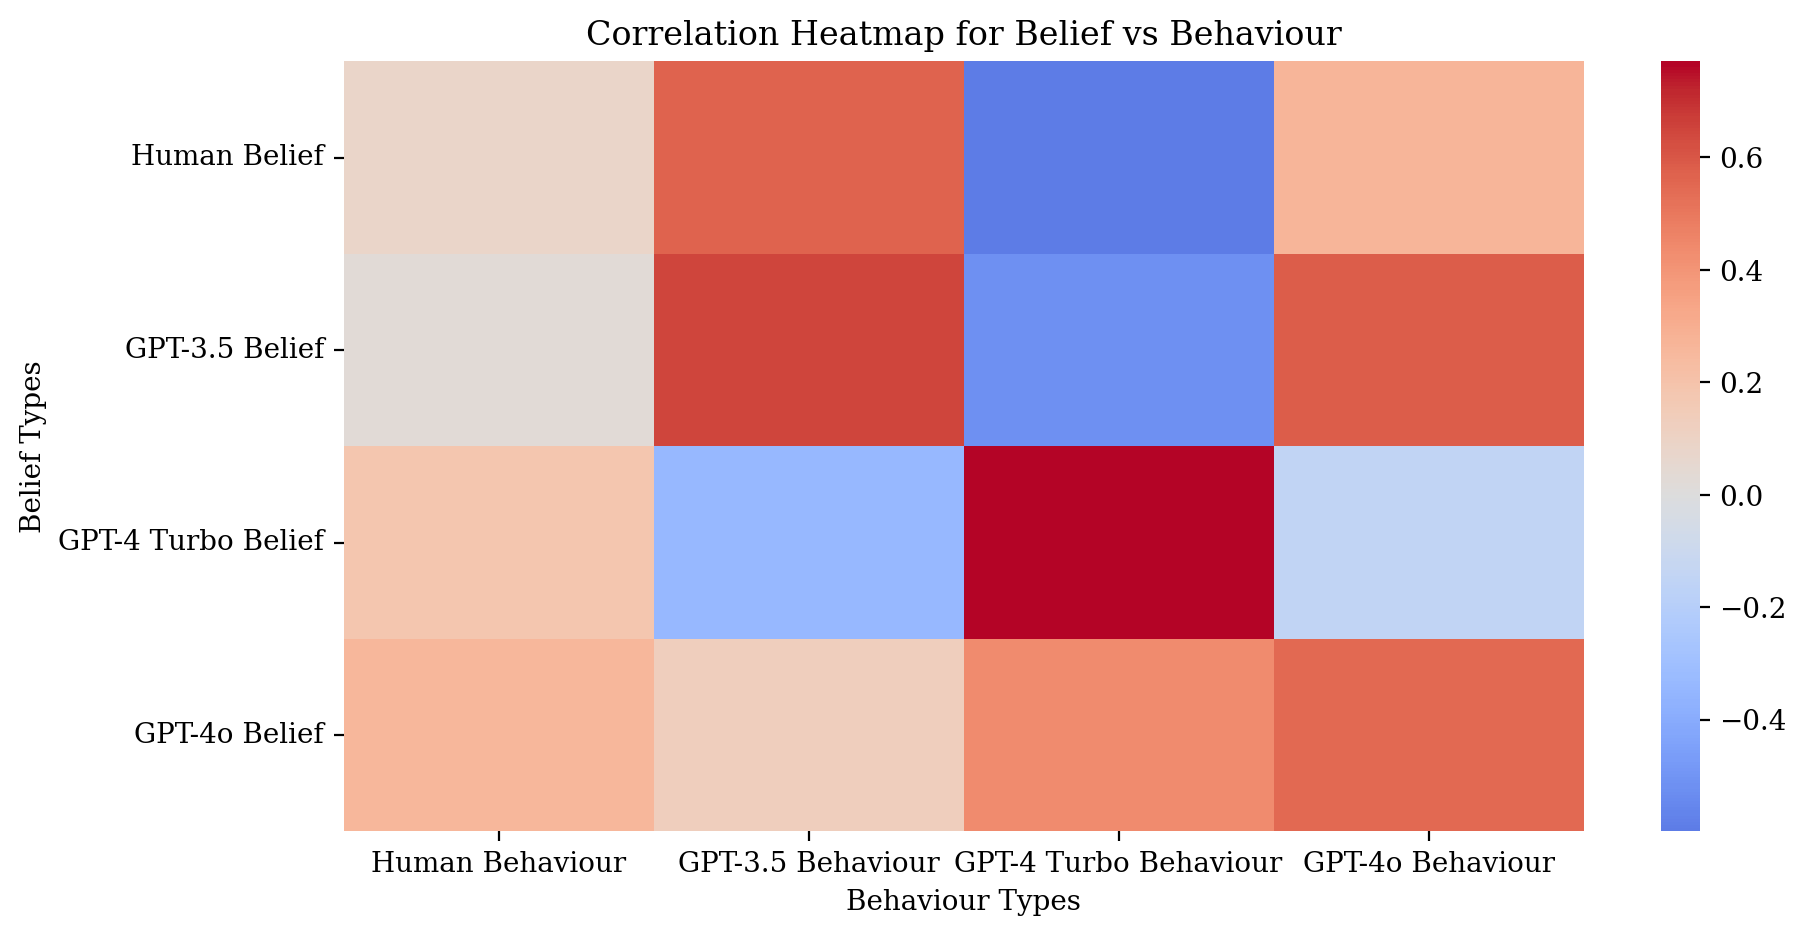

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

correlation_results = pd.DataFrame(index=beliefs.keys(), columns=behaviour.keys())

for belief_key, belief_values in beliefs.items():
    for behaviour_key, behaviour_series in behaviour.items():
        correlation_coefficient, _ = pearsonr(belief_values, behaviour_series.values)
        correlation_results.at[belief_key, behaviour_key] = correlation_coefficient

plt.rcParams["font.family"] = "serif"

plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(correlation_results.astype(float), annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap for Belief vs Behaviour')
plt.xlabel('Behaviour Types')
plt.ylabel('Belief Types')
plt.show()

In [53]:
correlation_results

,human_behaviour,gpt3.5_behaviour,gpt4_behaviour,gpt4o_behaviour
human_belief,0.567255,-0.153194,0.529665,0.101588
gpt3.5_belief,0.325949,0.858263,-0.178949,0.597823
gpt4_belief,0.276044,-0.290129,0.805477,-0.170442
gpt4o_belief,0.207977,0.503295,-0.18052,0.701575


In [37]:
corr_matrix

,Trial,Belief,Behaviour
Trial,1.000000,-0.928664,-0.055564
Belief,-0.928664,1.000000,0.085090
Behaviour,-0.055564,0.085090,1.000000


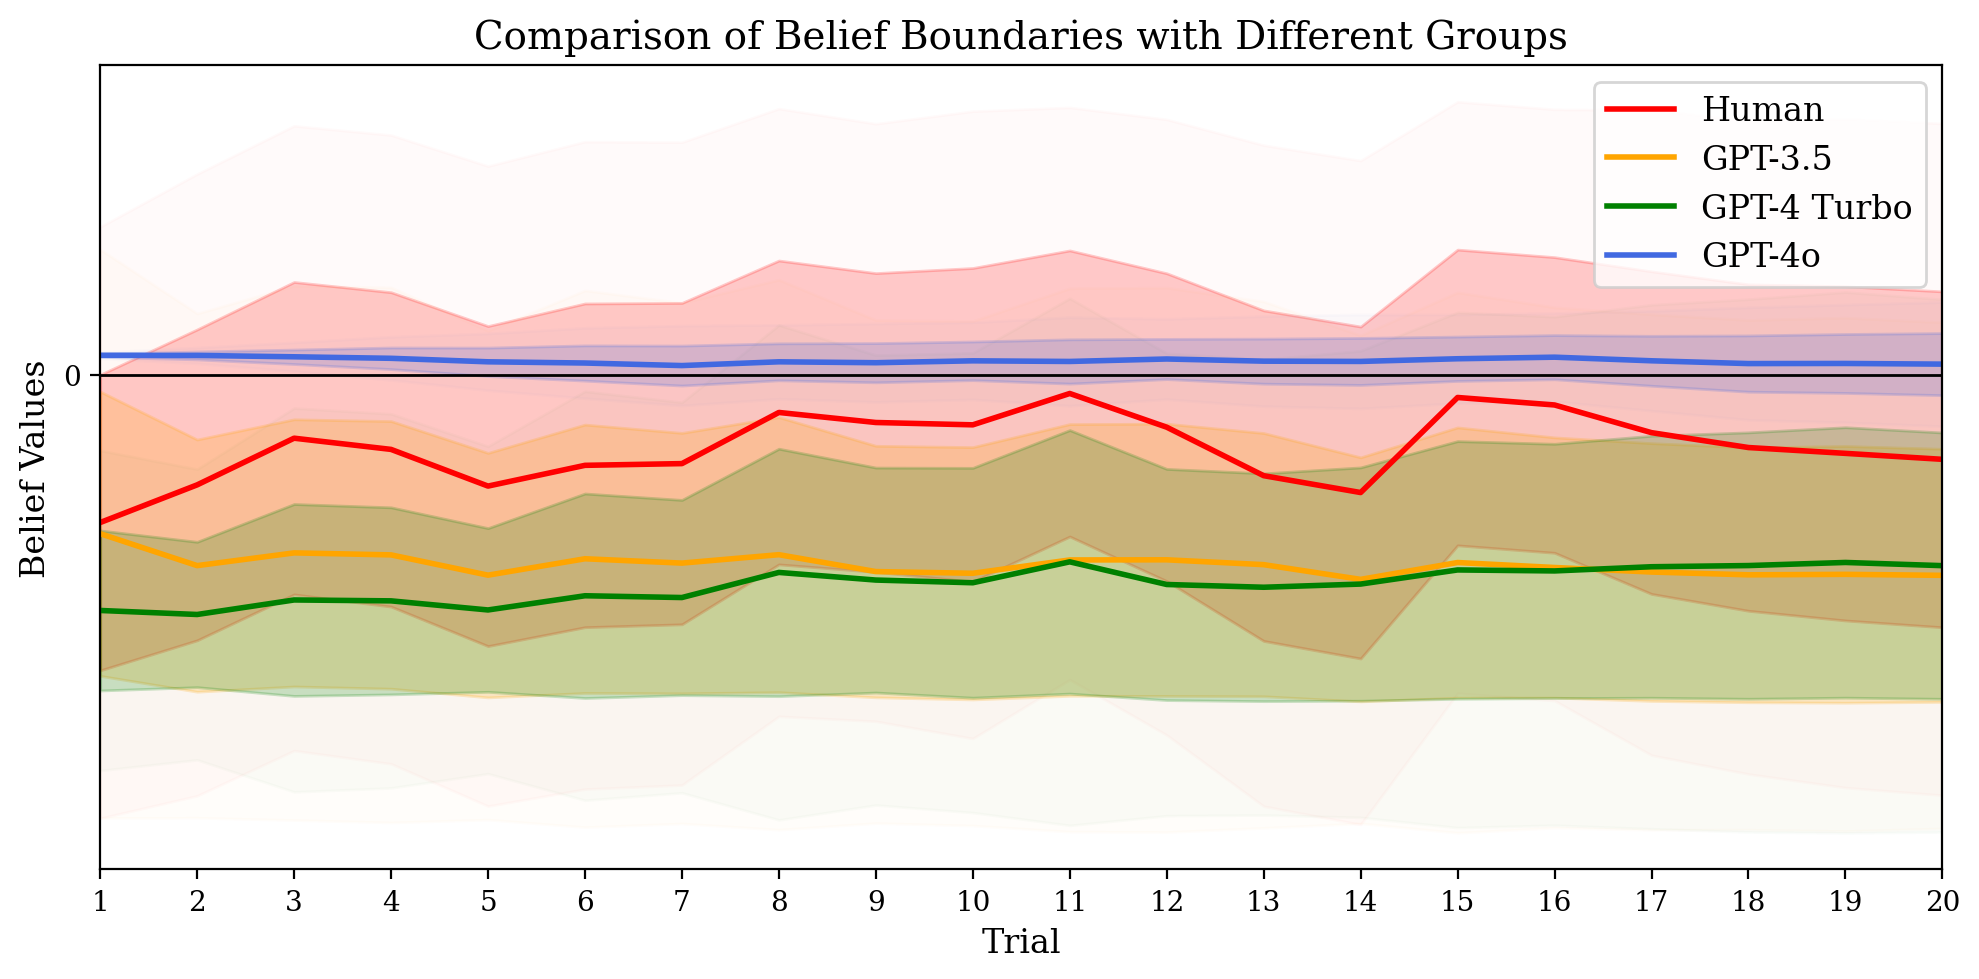

In [51]:
import numpy as np
import matplotlib.pyplot as plt

def plot_with_boundaries(data_dict, label, color):
    all_data = np.array(list(data_dict.values()))
    
    mean_values = np.mean(all_data, axis=0)
    std_dev = np.std(all_data, axis=0)

    plt.fill_between(range(1, 21), mean_values - std_dev, mean_values + std_dev, color=color, alpha=0.2)
    plt.fill_between(range(1, 21), mean_values - 2 * std_dev, mean_values + 2 * std_dev, color=color, alpha=0.02)

    plot_average_trend(data_dict, label, color)

def plot_average_trend(data_dict, label, color):
    all_data = np.array(list(data_dict.values()))
    average_trend = np.mean(all_data, axis=0)
    plt.plot(range(1, 21), average_trend, label=label, color=color, linewidth=2.0)

plt.figure(figsize=(10, 5), dpi=200)
plt.rcParams["font.family"] = "serif"

plot_with_boundaries(beliefs['human_belief'], 'Human', 'red')
plot_with_boundaries(beliefs['gpt3.5_belief'], 'GPT-3.5', 'orange')
plot_with_boundaries(beliefs['gpt4_belief'], 'GPT-4 Turbo', 'green')
plot_with_boundaries(beliefs['gpt4o_belief'], 'GPT-4o', 'royalblue')

plt.xticks(ticks=range(1, 21), labels=range(1, 21))
plt.xlim(1, 20)
plt.title('Comparison of Belief Boundaries with Different Groups', fontsize=14)
plt.xlabel('Trial', fontsize=12)
plt.ylabel('Belief Values', fontsize=12)
plt.yticks([0])

plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.grid(False)
plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.show()

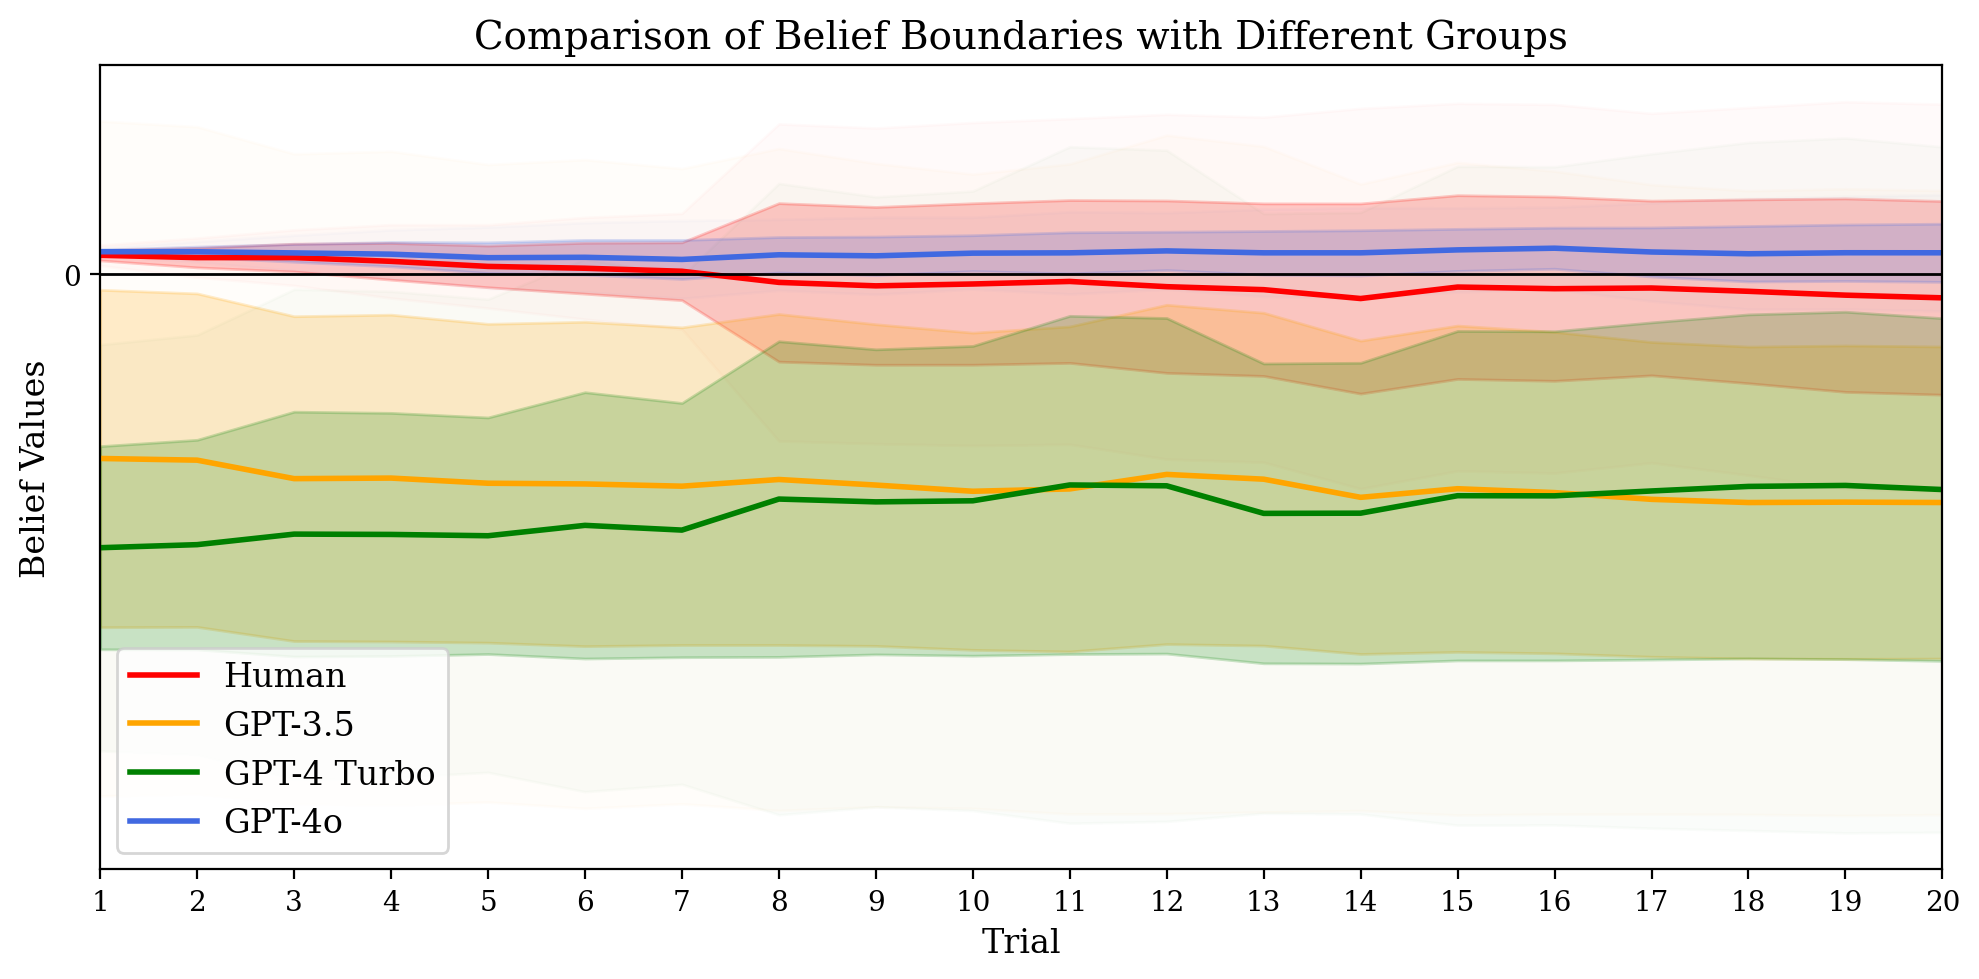

In [304]:
import numpy as np
import matplotlib.pyplot as plt

def plot_with_boundaries(data_dict, label, color):
    all_data = np.array(list(data_dict.values()))
    
    mean_values = np.mean(all_data, axis=0)
    std_dev = np.std(all_data, axis=0)

    plt.fill_between(range(1, 21), mean_values - std_dev, mean_values + std_dev, color=color, alpha=0.2)
    plt.fill_between(range(1, 21), mean_values - 2 * std_dev, mean_values + 2 * std_dev, color=color, alpha=0.02)

    plot_average_trend(data_dict, label, color)

def plot_average_trend(data_dict, label, color):
    all_data = np.array(list(data_dict.values()))
    average_trend = np.mean(all_data, axis=0)
    plt.plot(range(1, 21), average_trend, label=label, color=color, linewidth=2.0)

plt.figure(figsize=(10, 5), dpi=200)
plt.rcParams["font.family"] = "serif"

plot_with_boundaries(beliefs['human_belief'], 'Human', 'red')
plot_with_boundaries(beliefs['gpt3.5_belief'], 'GPT-3.5', 'orange')
plot_with_boundaries(beliefs['gpt4_belief'], 'GPT-4 Turbo', 'green')
plot_with_boundaries(beliefs['gpt4o_belief'], 'GPT-4o', 'royalblue')

plt.xticks(ticks=range(1, 21))
plt.xlim(1, 20)
plt.title('Comparison of Belief Boundaries with Different Groups', fontsize=14)
plt.xlabel('Trial', fontsize=12)
plt.ylabel('Belief Values', fontsize=12)

plt.yticks([0])

plt.axhline(0, color='black', linewidth=1, linestyle='-')

plt.grid(False)

plt.legend(fontsize=12, loc='best')
plt.tight_layout()
plt.show()